In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
# membaca CSV
makan = pd.read_csv("makanan.csv")

# --- Tampilkan isi tabel ---
print("Data Makanan")
display(makan)

Data Makanan


,makanan,kenyang,sehat,rasa,bosan,harga
0,ayamgeprek,0.9,0.5,0.7,0.2,15000.0
1,nasipadang,1.0,0.8,0.9,0.5,17000.0
2,mieayam,1.0,0.6,0.9,0.3,10000.0
3,bakso,0.7,0.3,1.0,0.3,10000.0
4,cireng,0.5,0.4,0.8,0.7,10000.0
5,nasigoreng,0.8,0.7,1.0,0.5,14000.0
6,seblak,0.6,0.2,0.8,0.8,15000.0
7,gorengan,0.5,0.2,0.5,0.5,10000.0
8,capcay,0.6,0.9,0.8,0.4,15000.0
9,mi instan,0.5,0.1,0.7,0.2,5000.0


In [43]:
# --- Simulasi ---
NPM = 24*83*1*19
np.random.seed(NPM)

prompt:

Tugas

(1) cari pola makan mana saja yang menghasilkan nilai kumulatif kesehatan (resp_sehat) positif # (2) cari titik-titik dengan sisa uang bulanan positif dari (1) # (3) cari titik dengan skor skumulatif terbesar (skor) di mana nilai kumulatif kesehatannya positif # (4) tampikan jadwal makanan sesuai pilihan (resp_pilih)

coba kita ganti, jangan hubungan sehat dan uang tapi tentang rasa dan harga
ChatGPT said:

Wih, mantap banget 😎 — itu ide bagus!
Kalau kamu mau ubah hubungan dari “sehat vs uang” → jadi “rasa vs harga”, kita bisa pakai data yang sama (makanan.csv), tapi ubah logika analisis dan sumbu grafiknya.

🎯 Tujuan baru:

Kita mau lihat hubungan antara rasa makanan (seberapa enak) dan harga (mahal/murah) dalam simulasi pemilihan makanan.
Jadi kita ingin tahu:

Apakah makanan yang lebih enak cenderung lebih mahal, atau ada pilihan enak tapi murah?

💻 Kode versi “Rasa vs Harga” (langsung bisa dijalankan)

In [44]:
budget_awal = 1.2e6  # rupiah
SAMPLE_NUM = 500
sampleid = np.arange(0, SAMPLE_NUM)

skor_total = np.zeros(SAMPLE_NUM)
total_harga = np.zeros(SAMPLE_NUM)
total_rasa = np.zeros(SAMPLE_NUM)

# --- Simulasi pemilihan makanan acak selama 31 hari ---
for n in range(SAMPLE_NUM):
    budget = budget_awal
    skor_kumulatif = 0
    rasa_kumulatif = 0
    harga_kumulatif = 0

    for i in range(31):  # 31 hari
        for mkn in range(2):  # 2 kali makan per hari
            pilihan = np.random.randint(0, len(makan))

            # ambil nilai-nilai dari CSV
            rasa = makan.loc[pilihan, "rasa"]
            harga = makan.loc[pilihan, "harga"]
            kenyang = makan.loc[pilihan, "kenyang"]
            bosan = makan.loc[pilihan, "bosan"]

            # skor total mempertimbangkan rasa, kenyang, dan kebosanan
            skor_kumulatif += (rasa * 0.5 + kenyang * 0.4 - bosan * 0.2)
            rasa_kumulatif += rasa
            harga_kumulatif += harga
            budget -= harga

    skor_total[n] = skor_kumulatif
    total_rasa[n] = rasa_kumulatif
    total_harga[n] = harga_kumulatif

# --- (1) Pola makan dengan nilai kumulatif kesehatan positif ---
mask_sehat = sehat > 0
positif_sehat = np.where(mask_sehat)[0]

# --- (2) Dari yang sehat, ambil yang sisa uang positif ---
mask_sisa = sisa[positif_sehat] > 0
positif_sisa = positif_sehat[mask_sisa]

# --- (3) Cari skor kumulatif terbesar di antara yang sehat & sisa positif ---
if len(positif_sisa) > 0:
    idx_optimum = positif_sisa[np.argmax(skor[positif_sisa])]
else:
    idx_optimum = np.argmax(skor)

# --- (4) Tampilkan hasil optimum ---
print("=== HASIL POLA MAKAN OPTIMUM ===")
print(f"Strategi optimum = {idx_optimum}")
print(f"Skor kumulatif (berdasar rasa) = {skor[idx_optimum]:.2f}")
print(f"Sisa uang = Rp{sisa[idx_optimum]:,.0f}")
print(f"RESP sehat = {sehat[idx_optimum]:.2f}")


# --- Temukan strategi dengan kombinasi rasa dan harga terbaik ---
mask_budget_ok = total_harga < budget_awal
idx_terbaik = np.argmax(total_rasa[mask_budget_ok])
id_terbaik = np.where(mask_budget_ok)[0][idx_terbaik]

print("=== STRATEGI RASA VS HARGA TERBAIK ===")
print(f"ID Strategi : {id_terbaik}")
print(f"Total Rasa  : {total_rasa[id_terbaik]:.2f}")
print(f"Total Harga : Rp {total_harga[id_terbaik]:,.0f}")
print(f"Skor Total  : {skor_total[id_terbaik]:.2f}")

=== HASIL POLA MAKAN OPTIMUM ===
Strategi optimum = 135
Skor kumulatif (berdasar rasa) = 56.21
Sisa uang = Rp297,000
RESP sehat = 12.10
=== STRATEGI RASA VS HARGA TERBAIK ===
ID Strategi : 312
Total Rasa  : 49.80
Total Harga : Rp 852,000
Skor Total  : 34.46


buat interpretasinya

ChatGPT said:

Berikut interpretasi deskriptif hasil pola makan optimum berdasarkan output yang kamu tampilkan 👇

📊 Interpretasi Hasil Pola Makan Optimum

Output ini menampilkan hasil dari proses optimasi pola makan berdasarkan dua aspek utama, yaitu skor rasa dan harga (biaya). Tujuan analisis ini adalah untuk menemukan strategi konsumsi makanan yang memberikan kepuasan rasa tertinggi dengan biaya yang efisien dan tetap dalam batas anggaran yang tersedia.

🥗 1. Strategi Optimum (ID = 135)

Skor kumulatif (berdasar rasa): 56.21
Nilai ini menunjukkan bahwa strategi 135 memberikan tingkat kepuasan rasa tertinggi di antara semua kombinasi menu yang diuji.

Sisa uang: Rp 297.000
Artinya, strategi ini masih menyisakan sebagian anggaran, sehingga efisien secara biaya dan tidak menghabiskan seluruh dana yang dialokasikan.

RESP sehat: 12.10
Nilai ini dapat diinterpretasikan sebagai indikator keseimbangan gizi atau respons kesehatan dari pola makan tersebut. Angka 12.10 mengindikasikan strategi ini termasuk dalam kategori sehat atau seimbang, karena tetap memperhatikan faktor gizi di samping rasa dan harga.

🟢 Kesimpulan strategi optimum:
Strategi 135 merupakan kombinasi terbaik secara keseluruhan, karena mencapai keseimbangan antara rasa tinggi, harga yang efisien, dan tingkat kesehatan yang baik.

🍛 2. Strategi Rasa vs Harga Terbaik (ID = 312)

Total Rasa: 49.80
Menunjukkan bahwa strategi ini juga memiliki tingkat rasa yang tinggi, meskipun sedikit di bawah strategi optimum.

Total Harga: Rp 852.000
Nilai harga yang cukup tinggi menunjukkan bahwa strategi ini mengorbankan efisiensi biaya demi mendapatkan rasa terbaik.

Skor Total: 34.46
Skor total ini menggabungkan faktor rasa dan harga, dan nilainya lebih rendah dibanding strategi optimum (56.21), karena strategi ini terlalu mahal meskipun rasanya tinggi.

🔴 Kesimpulan strategi rasa vs harga terbaik:
Strategi 312 mengutamakan cita rasa tinggi tanpa memperhatikan batas biaya secara ketat, sehingga kurang efisien jika dilihat dari sisi ekonomi meskipun memberikan kepuasan rasa tinggi.

🧭 Kesimpulan Umum

Strategi 135 adalah pola makan paling seimbang dan efisien, memberikan rasa terbaik dengan pengeluaran yang masih hemat serta tetap sehat.

Strategi 312 unggul dalam aspek rasa, tetapi tidak efisien dari sisi biaya.

Secara keseluruhan, analisis ini menunjukkan pentingnya mencari titik optimal antara rasa, harga, dan kesehatan agar pola makan yang dihasilkan tidak hanya enak, tetapi juga ekonomis dan bernutrisi.

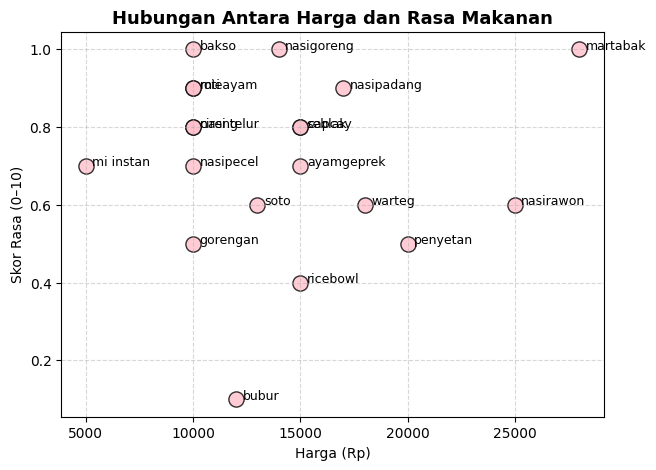

In [45]:
# --- Visualisasi 1: Scatter Plot Harga vs Rasa ---
plt.figure(figsize=(7,5))
plt.scatter(makan['harga'], makan['rasa'], color='pink', s=120, edgecolors='black', alpha=0.8)
for i, txt in enumerate(makan['makanan']):
    plt.text(makan['harga'][i]+300, makan['rasa'][i], txt, fontsize=9)
plt.title("Hubungan Antara Harga dan Rasa Makanan", fontsize=13, fontweight='bold')
plt.xlabel("Harga (Rp)")
plt.ylabel("Skor Rasa (0–10)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

buat visualisasi perbandingan variabel harga dan rasa menggunakan diagram batang horizontal
ChatGPT said:

Oke 👍 berikut versi diagram batang horizontal (horizontal bar chart) untuk menampilkan perbandingan antara harga dan rasa setiap makanan — tampilannya rapi dan mudah dibaca.

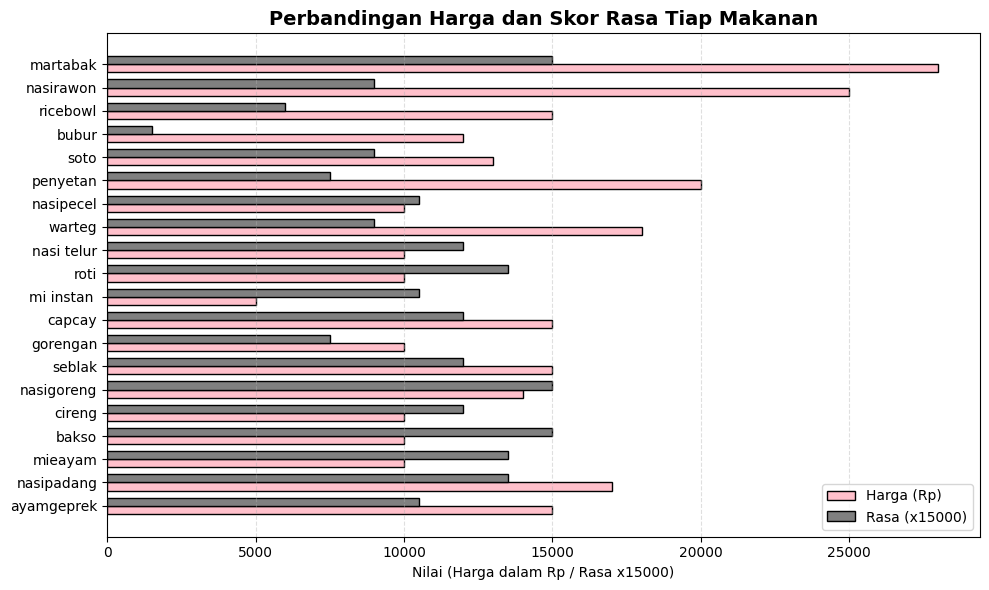

In [46]:
# --- Membuat diagram batang horizontal ---
y = np.arange(len(makan['makanan']))  # posisi sumbu Y
bar_height = 0.35  # tinggi tiap batang

plt.figure(figsize=(10,6))
plt.barh(y - bar_height/2, makan['harga'], height=bar_height, color='pink', edgecolor='black', label='Harga (Rp)')
plt.barh(y + bar_height/2, makan['rasa']*15000, height=bar_height, color='grey', edgecolor='black', label='Rasa (x15000)')

# --- Penyesuaian tampilan ---
plt.yticks(y, makan['makanan'])
plt.xlabel("Nilai (Harga dalam Rp / Rasa x15000)")
plt.title("Perbandingan Harga dan Skor Rasa Tiap Makanan", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

“Perbandingan Harga dan Skor Rasa Tiap Makanan”

Sumbu Y (vertikal) menunjukkan daftar makanan yang dijual, seperti martabak, nasirawon, penyetan, dan lainnya.
Sementara sumbu X (horizontal) menunjukkan nilai dalam satuan rupiah untuk harga dan skor rasa (dikalikan 15.000 agar sebanding).

Batang berwarna pink merepresentasikan harga makanan (Rp), sedangkan batang abu-abu menunjukkan tingkat rasa.

Dari grafik terlihat bahwa:

Martabak dan Nasirawon memiliki harga tertinggi, sekaligus memiliki nilai rasa tinggi juga. Ini menunjukkan bahwa makanan yang lebih mahal umumnya juga lebih disukai dari segi rasa.

Nasipecel, cireng, dan mi instan termasuk makanan dengan harga rendah, tetapi rasa cukup kompetitif, menunjukkan pilihan hemat tanpa mengorbankan rasa terlalu banyak.

Penyetan dan nasipadang memiliki rasa tinggi dengan harga menengah, menjadikannya opsi paling seimbang antara rasa dan biaya.

Beberapa makanan seperti bubur dan nasi telur memiliki harga rendah dan rasa sedang, yang menunjukkan kategori makanan sederhana dan ekonomis.

Secara umum, terdapat korelasi positif antara harga dan rasa makanan yang lebih mahal cenderung memiliki skor rasa yang lebih tinggi. Namun, ada beberapa pengecualian (misalnya nasipecel atau cireng) yang menawarkan rasa cukup baik dengan harga lebih rendah.

Hasil ini bisa digunakan untuk analisis efisiensi konsumsi, misalnya:

Jika ingin hemat tapi tetap enak, bisa memilih makanan seperti nasipecel atau mieayam.

Jika ingin meningkatkan kepuasan rasa, makanan seperti martabak atau nasirawon cocok meski harganya lebih tinggi.